In [218]:
# install.packages('moderndive')
# install.packages('ISLR')
# install.packages('corrplot')
# install.packges('janitor')

In [299]:
# Adjust plot aspect ratio and apperance
library(repr)
options(repr.plot.width = 6, repr.plot.height = 3, repr.plot.res = 400)

library("tidyverse")
library("moderndive")
library("janitor")
library("car")

# Only display 10 rows of tibble
repr_html.tbl_df <- function(obj, ..., rows = 10) repr:::repr_html.data.frame(obj, ..., rows = rows)

# ggplot theme
theme <- list(
  theme_bw(),
  scale_color_brewer(palette = "Dark2"),
  theme(legend.position = "none")
)

# fit summary
fit_summary <- function(model) {
  return(round(broom::glance(model)[c("r.squared", "df", "nobs", "sigma", "statistic")], 2))
}

In [53]:
# Recidivism dataset
# data <- read_csv('./playing/train.csv',col_types = cols())

In [54]:
data <- evals |> select(ID, score, age, gender)

In [55]:
data |>
  sample_n(5)

ID,score,age,gender
<int>,<dbl>,<int>,<fct>
463,4.1,42,female
356,5.0,50,male
289,4.1,34,male
45,4.4,33,female
117,3.3,57,female


In [56]:
lm(score ~ age * gender, data = data)


Call:
lm(formula = score ~ age * gender, data = data)

Coefficients:
   (Intercept)             age      gendermale  age:gendermale  
       4.88299        -0.01752        -0.44604         0.01353  


In [57]:
m <- lm(score ~ age * gender, data = data)

get_regression_table(m)[c("term", "estimate", "lower_ci", "upper_ci")]

term,estimate,lower_ci,upper_ci
<chr>,<dbl>,<dbl>,<dbl>
intercept,4.883,4.480,5.286
age,-0.018,-0.026,-0.009
gender: male,-0.446,-0.968,0.076
age:gendermale,0.014,0.003,0.024


In [58]:
get_regression_table(m)

term,estimate,std_error,statistic,p_value,lower_ci,upper_ci
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
intercept,4.883,0.205,23.795,0.000,4.480,5.286
age,-0.018,0.004,-3.919,0.000,-0.026,-0.009
gender: male,-0.446,0.265,-1.681,0.094,-0.968,0.076
age:gendermale,0.014,0.006,2.446,0.015,0.003,0.024


`geom_smooth()` using formula 'y ~ x'



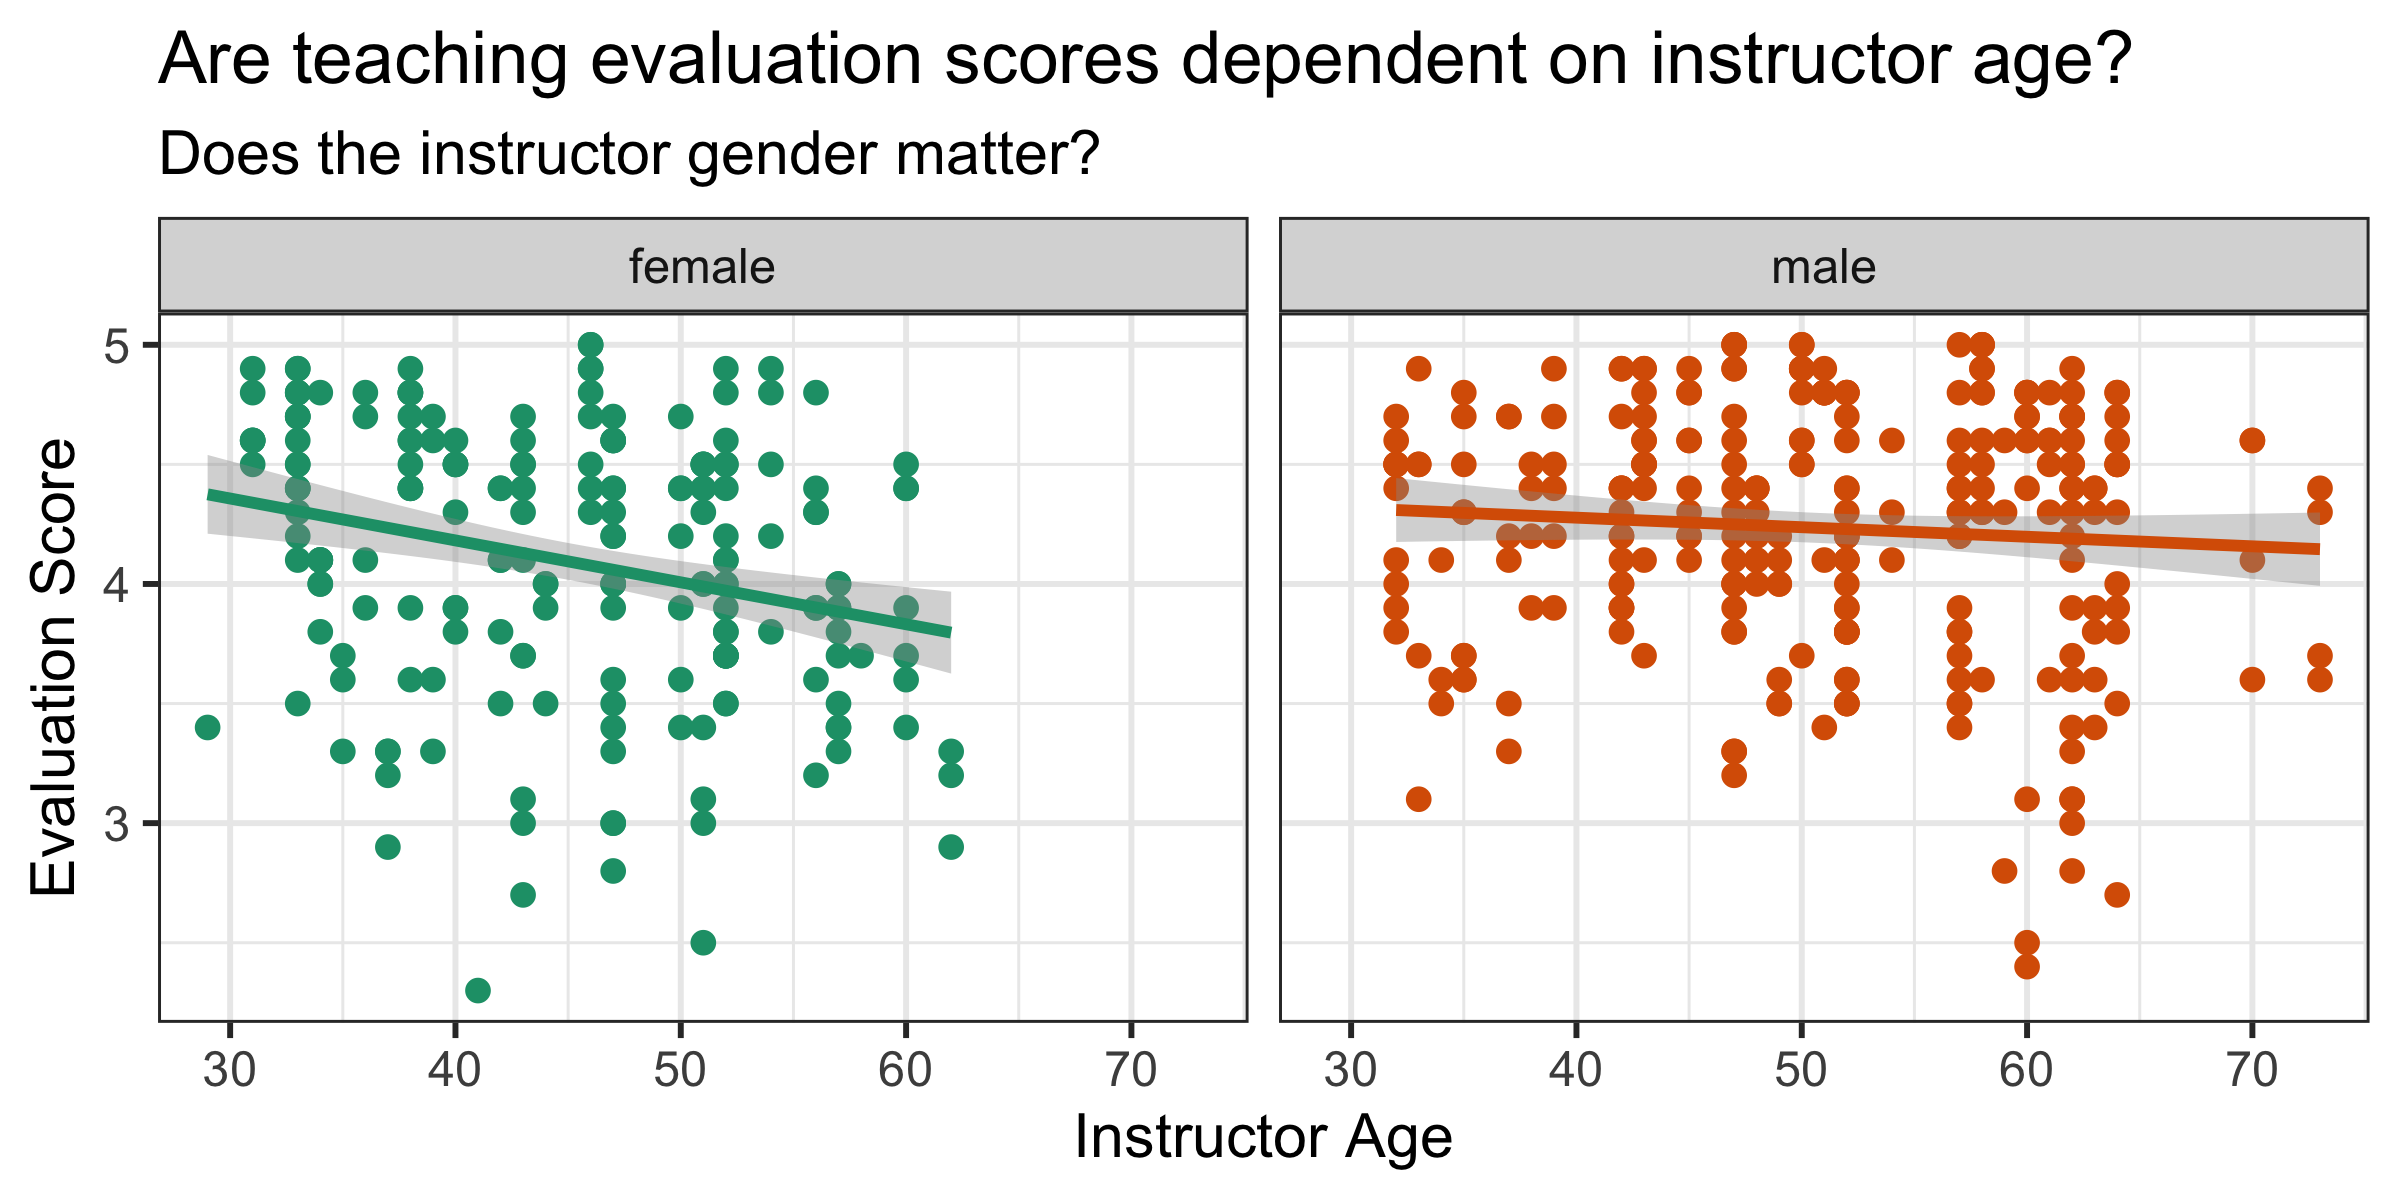

In [63]:
ggplot(data, aes(x = age, y = score, color = gender)) +
  geom_point() +
  facet_wrap(~gender) +
  theme_classic() +
  labs(
    x = "Instructor Age", y = "Evaluation Score",
    title = "Are teaching evaluation scores dependent on instructor age?",
    subtitle = "Does the instructor gender matter?"
  ) +
  theme +
  geom_smooth(method = "lm")

In [129]:
data2 <- data |>
  add_column(age2 = (data$age + rnorm(length(data$age), mean = 1, sd = 3))) |>
  add_column(random = rnorm(length(data$age), mean = 50, sd = 30))

In [130]:
data2

ID,score,age,gender,age2,random
<int>,<dbl>,<int>,<fct>,<dbl>,<dbl>
1,4.7,36,female,37.65033,63.10719
2,4.1,36,female,39.55519,42.18407
3,3.9,36,female,40.62380,43.93606
4,4.8,36,female,39.93252,-25.89642
5,4.6,59,male,63.37382,60.43774
⋮,⋮,⋮,⋮,⋮,⋮
459,4.5,32,male,28.60357,21.050971
460,3.5,42,female,46.54878,102.166216
461,4.4,42,female,45.65129,-2.029797


In [134]:
m <- lm(score ~ gender + age + age2 + random, data = data2)

get_regression_table(m)[c("term", "estimate", "lower_ci", "upper_ci")]

term,estimate,lower_ci,upper_ci
<chr>,<dbl>,<dbl>,<dbl>
intercept,4.451,4.188,4.715
gender: male,0.186,0.082,0.290
age,-0.015,-0.032,0.002
age2,0.007,-0.010,0.023
random,0.000,-0.001,0.002


## Guess the correlation

In [120]:
library(IRdisplay)
display_html('<iframe src="https://guessthecorrelation.com" width="500" height="550" frameBorder="0"></iframe>')

## Credit dataset

In [145]:
# install.packages('ISLR')
# install.packages('corrplot')

Installing package into ‘/opt/homebrew/lib/R/4.2/site-library’
(as ‘lib’ is unspecified)



In [273]:
library(ISLR)
credit_ch6 <- Credit %>%
  as_tibble() %>%
  select(ID,
    debt = Balance, credit_limit = Limit,
    income = Income, credit_rating = Rating, age = Age
  )

In [277]:
credit <- Credit |>
  as_tibble() |>
  clean_names() |>
  rename(debt = balance)

In [278]:
credit

id,income,limit,rating,cards,age,education,gender,student,married,ethnicity,debt
<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<int>
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
397,13.364,3838,296,5,65,17,Male,No,No,African American,480
398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138


In [279]:
res <- cor(credit |> select(where(is.numeric)))
round(res, 2)

,id,income,limit,rating,cards,age,education,debt
id,1.00,0.04,0.02,0.02,-0.04,0.06,0.00,0.01
income,0.04,1.00,0.79,0.79,-0.02,0.18,-0.03,0.46
limit,0.02,0.79,1.00,1.00,0.01,0.10,-0.02,0.86
rating,0.02,0.79,1.00,1.00,0.05,0.10,-0.03,0.86
cards,-0.04,-0.02,0.01,0.05,1.00,0.04,-0.05,0.09
age,0.06,0.18,0.10,0.10,0.04,1.00,0.00,0.00
education,0.00,-0.03,-0.02,-0.03,-0.05,0.00,1.00,-0.01
debt,0.01,0.46,0.86,0.86,0.09,0.00,-0.01,1.00


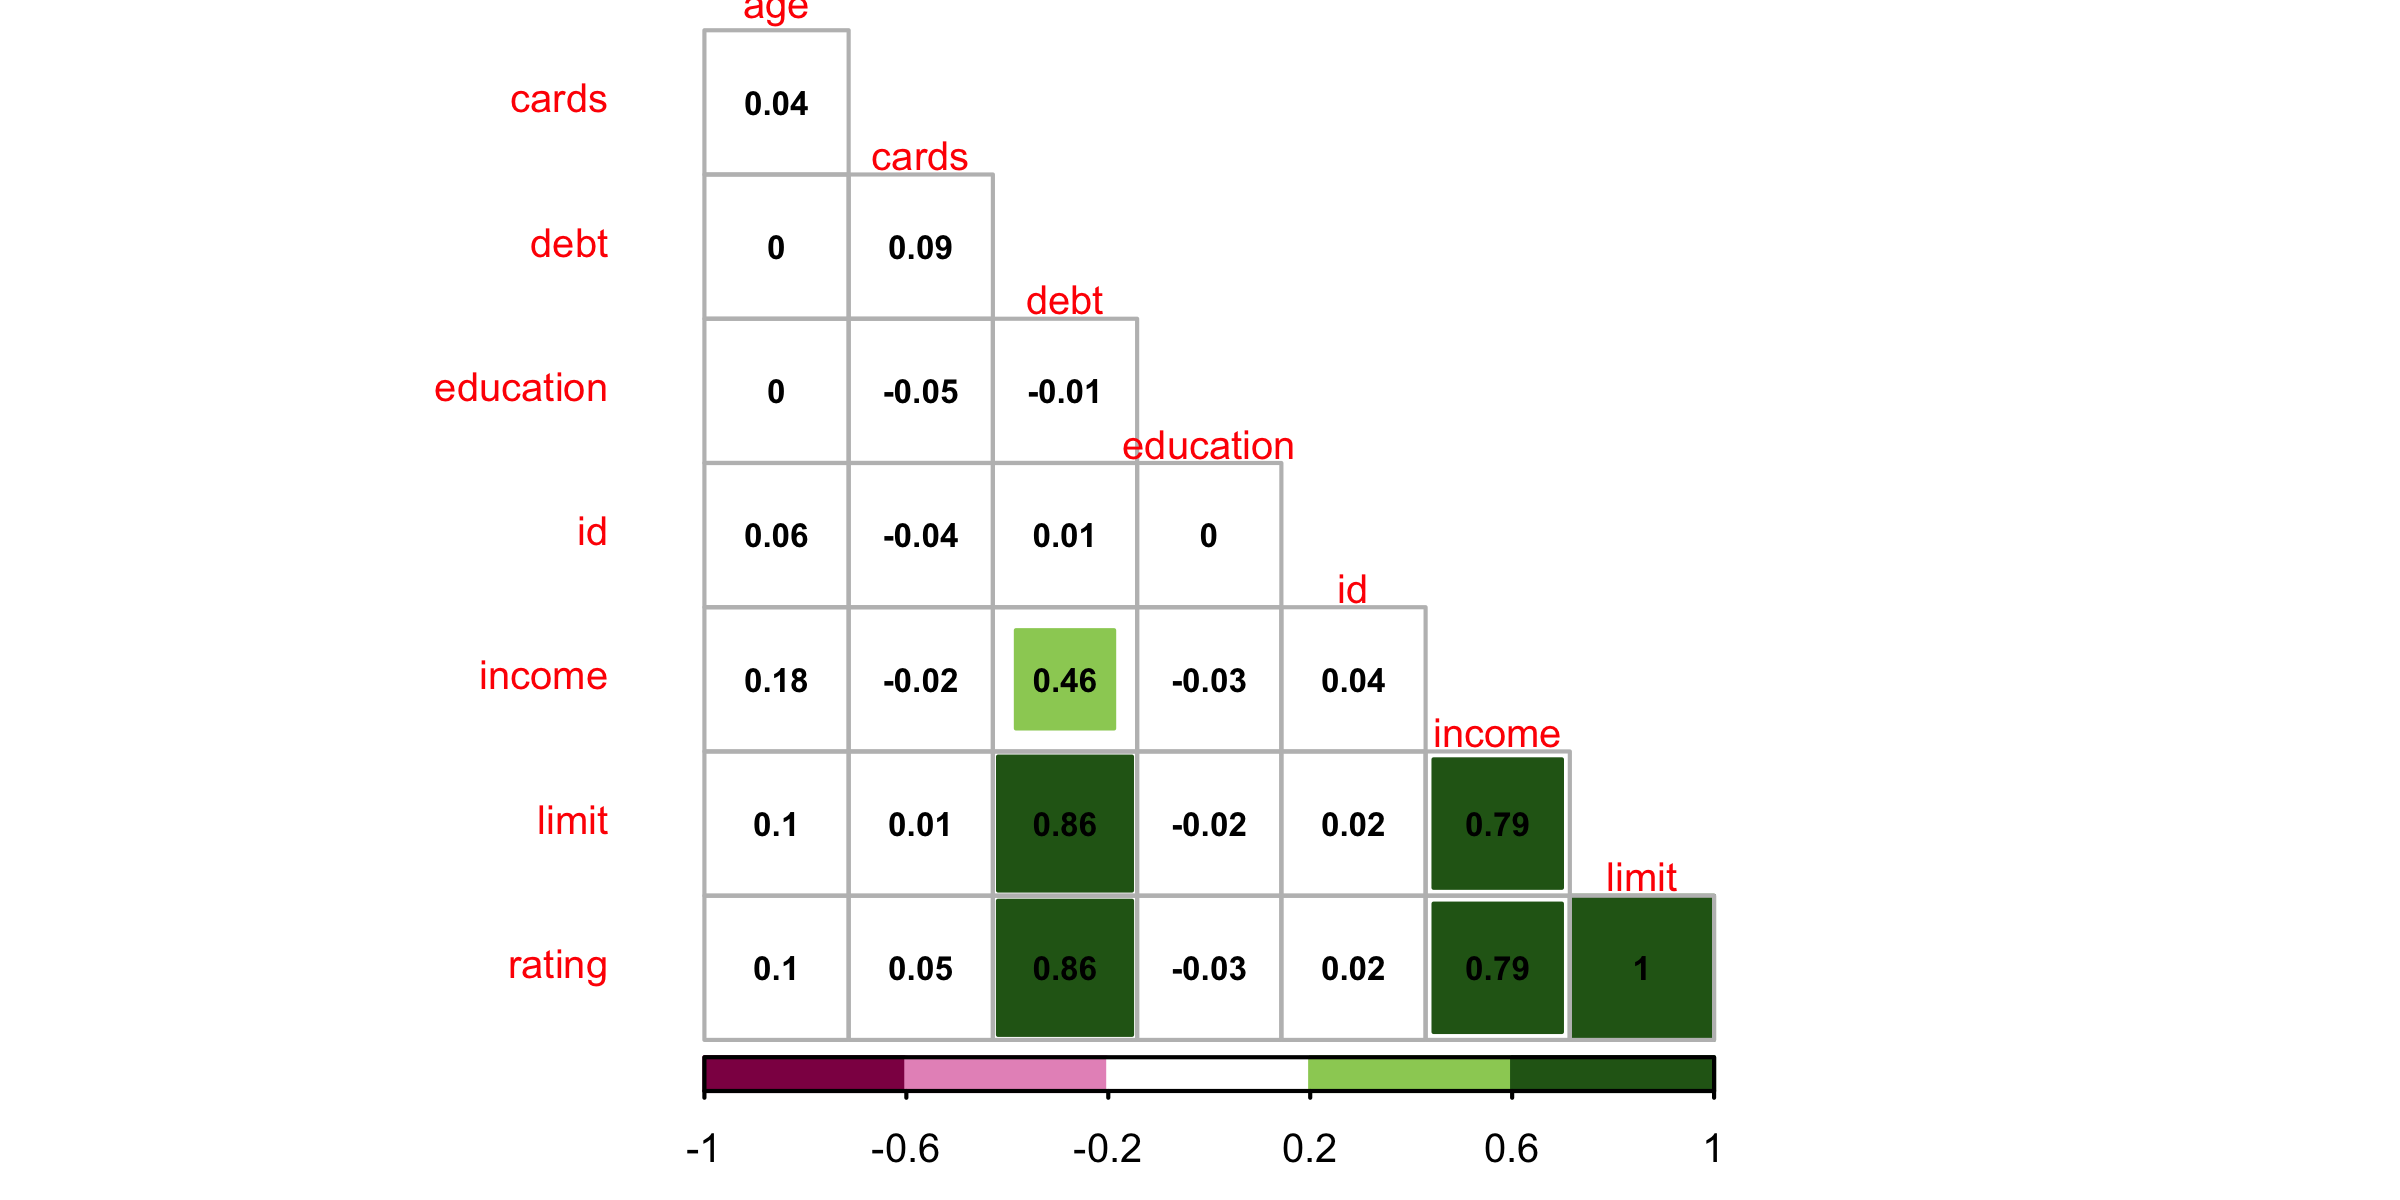

In [305]:
corrplot(res,
  method = "square", type = "lower", diag = FALSE,
  addCoef.col = "black", number.cex = 0.5, cl.cex = 0.6, tl.cex = 0.6, tl.pos = "ld", tl.offset = 1.2,
  order = "alphabet", tl.srt = 0, col = COL2("PiYG", 5)
)

In [281]:
model2 <- lm(debt ~ income + limit + rating, credit)
get_regression_table(model2)

term,estimate,std_error,statistic,p_value,lower_ci,upper_ci
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
intercept,-489.727,32.099,-15.257,0.000,-552.833,-426.622
income,-7.719,0.378,-20.418,0.000,-8.463,-6.976
limit,0.085,0.045,1.894,0.059,-0.003,0.173
rating,2.699,0.666,4.052,0.000,1.389,4.008


In [303]:
car::vif(model2)

income      limit     rating 
  2.687461 161.193323 160.707918

In [300]:
fit_summary(model2)

r.squared,df,nobs,sigma,statistic
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.88,3,400,162.35,934.57


## Case Study (10 mins)

In [53]:
data <- read_csv("boston.csv", col_types = cols()) #|> select(CRIM, LSTAT, INDUS, PTRATIO, DIS, RAD, NOX, MEDV)
data

CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0.06263,0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21,391.99,9.67,22.4
0.04527,0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21,396.90,9.08,20.6
0.06076,0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21,396.90,5.64,23.9


In [54]:
res <- cor(data |> select(where(is.numeric)))
round(res, 2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


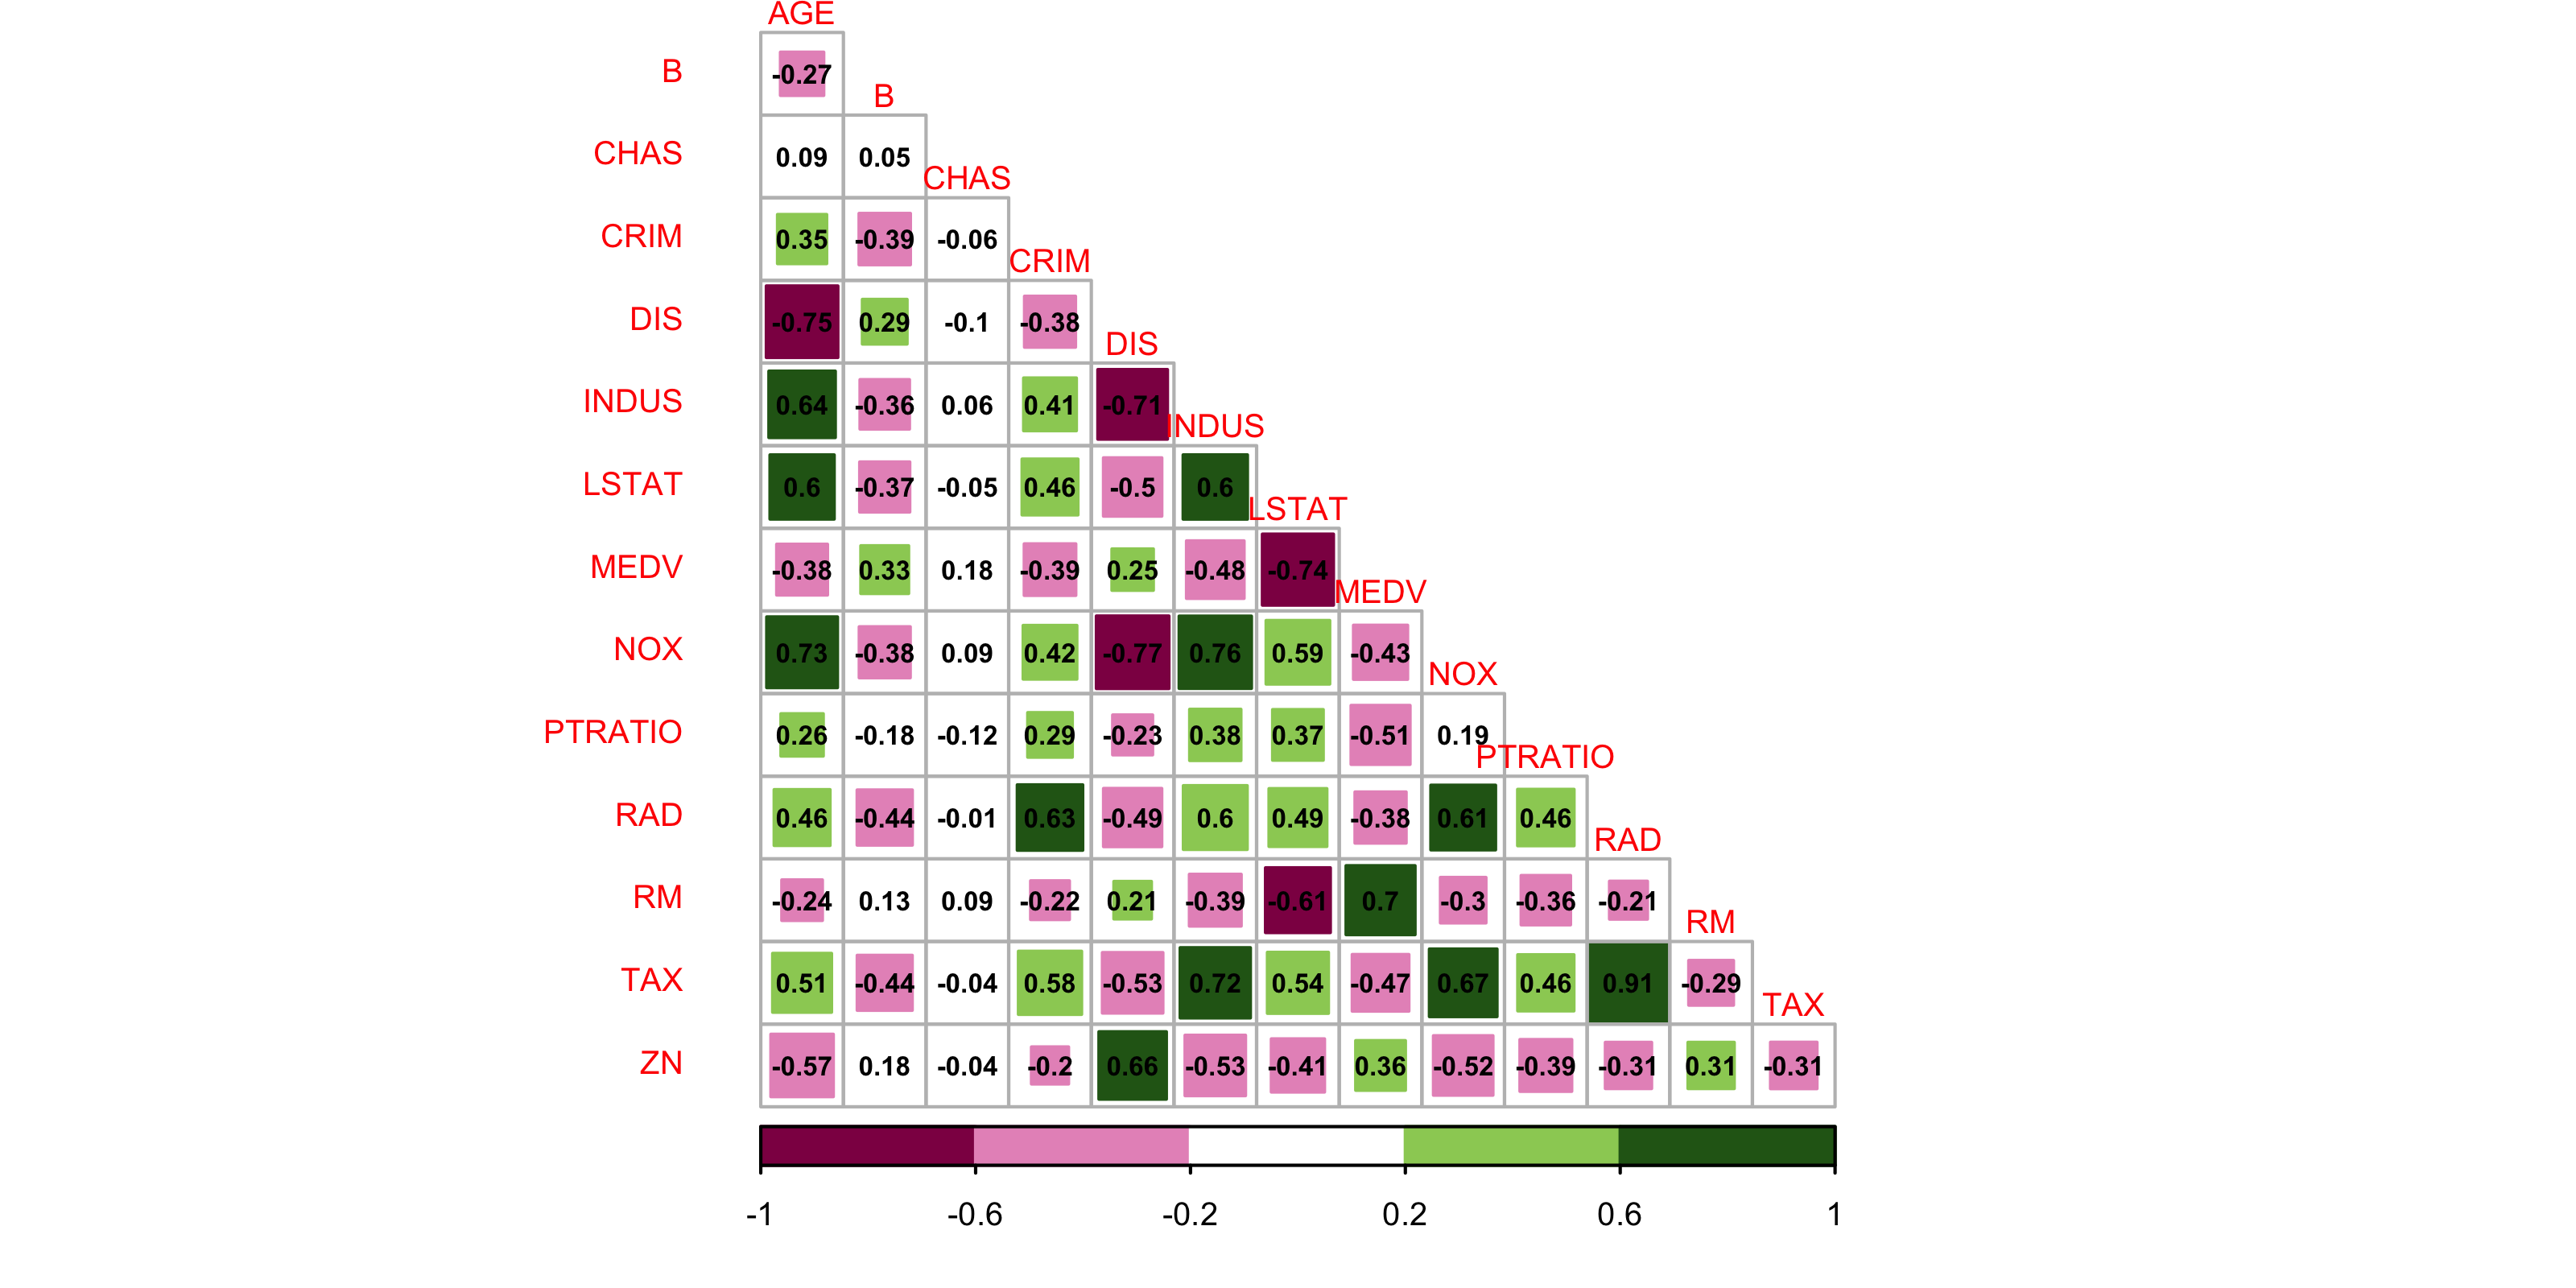

In [69]:
corrplot(res,
  method = "square", type = "lower", diag = FALSE,
  addCoef.col = "black", number.cex = 0.5, cl.cex = 0.6, tl.cex = 0.6, tl.pos = "ld", tl.offset = 1.2,
  order = "alphabet", tl.srt = 0, col = COL2("PiYG", 5)
)

In [64]:
model1 <- lm(MEDV ~ RAD + TAX + LSTAT, data)

get_regression_table(model1)

term,estimate,std_error,statistic,p_value,lower_ci,upper_ci
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
intercept,38.228,1.028,37.174,0.000,36.207,40.248
RAD,0.249,0.076,3.297,0.001,0.101,0.397
TAX,-0.017,0.004,-4.187,0.000,-0.025,-0.009
LSTAT,-0.880,0.045,-19.371,0.000,-0.970,-0.791


In [65]:
car::vif(model1)

RAD      TAX    LSTAT 
5.833456 6.306749 1.420805

`geom_smooth()` using formula 'y ~ x'



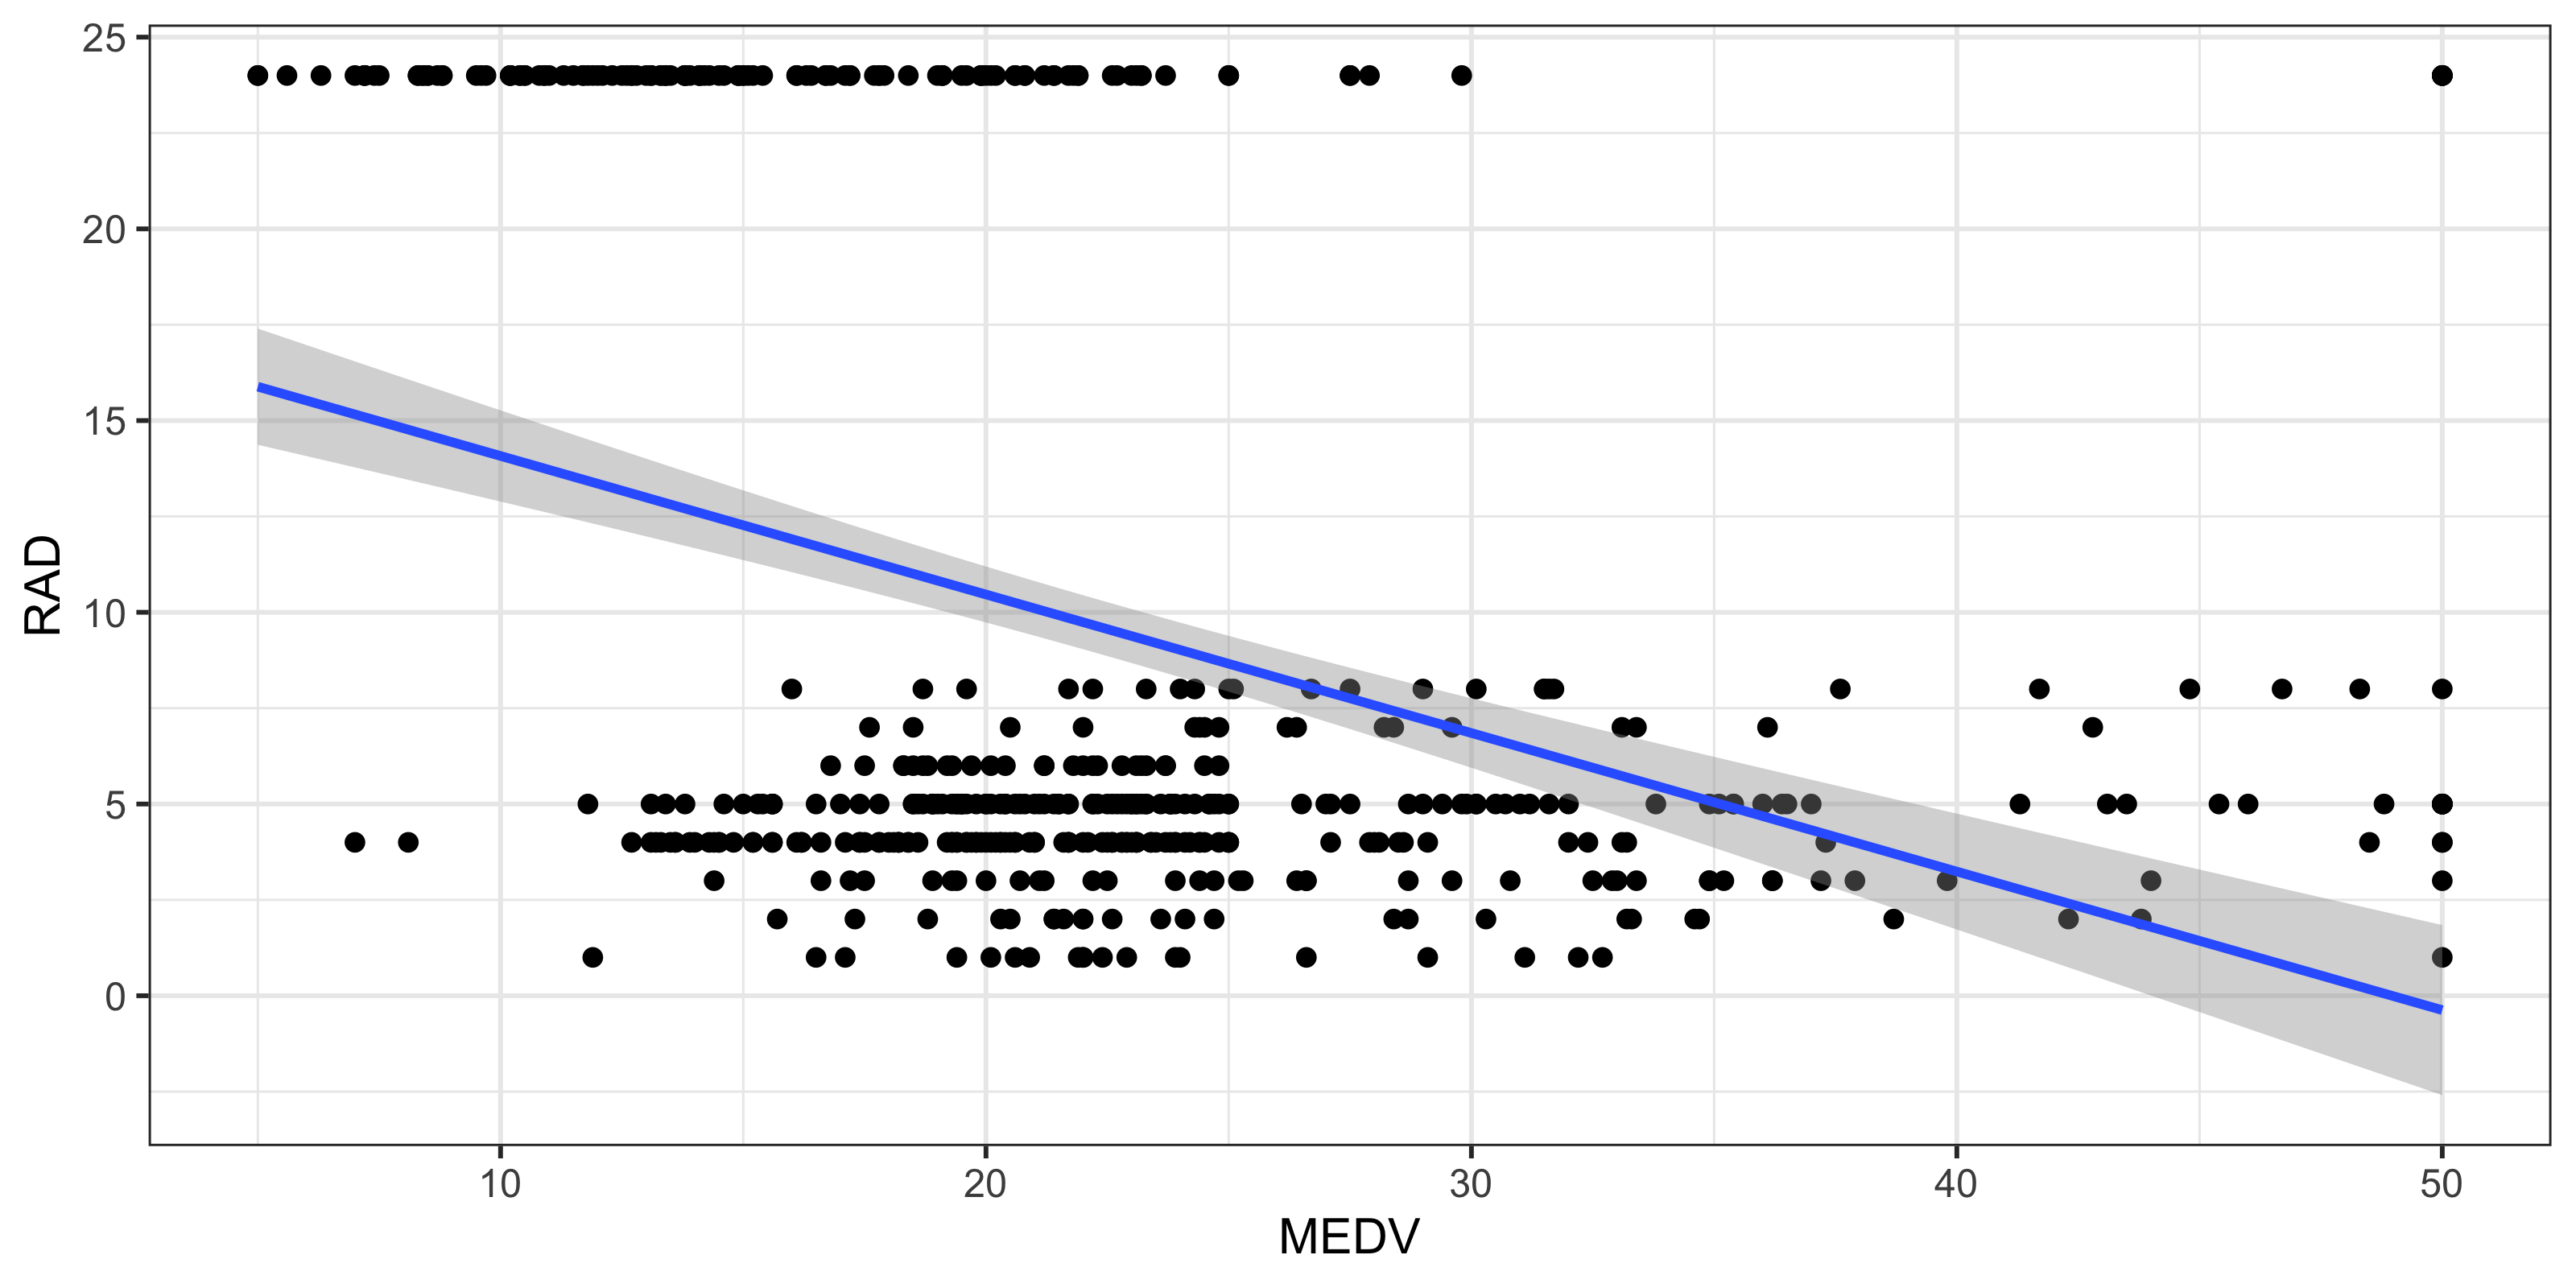

In [67]:
ggplot(data, aes(y = RAD, x = MEDV)) +
  geom_point() +
  theme_classic() +
  theme +
  geom_smooth(method = "lm")

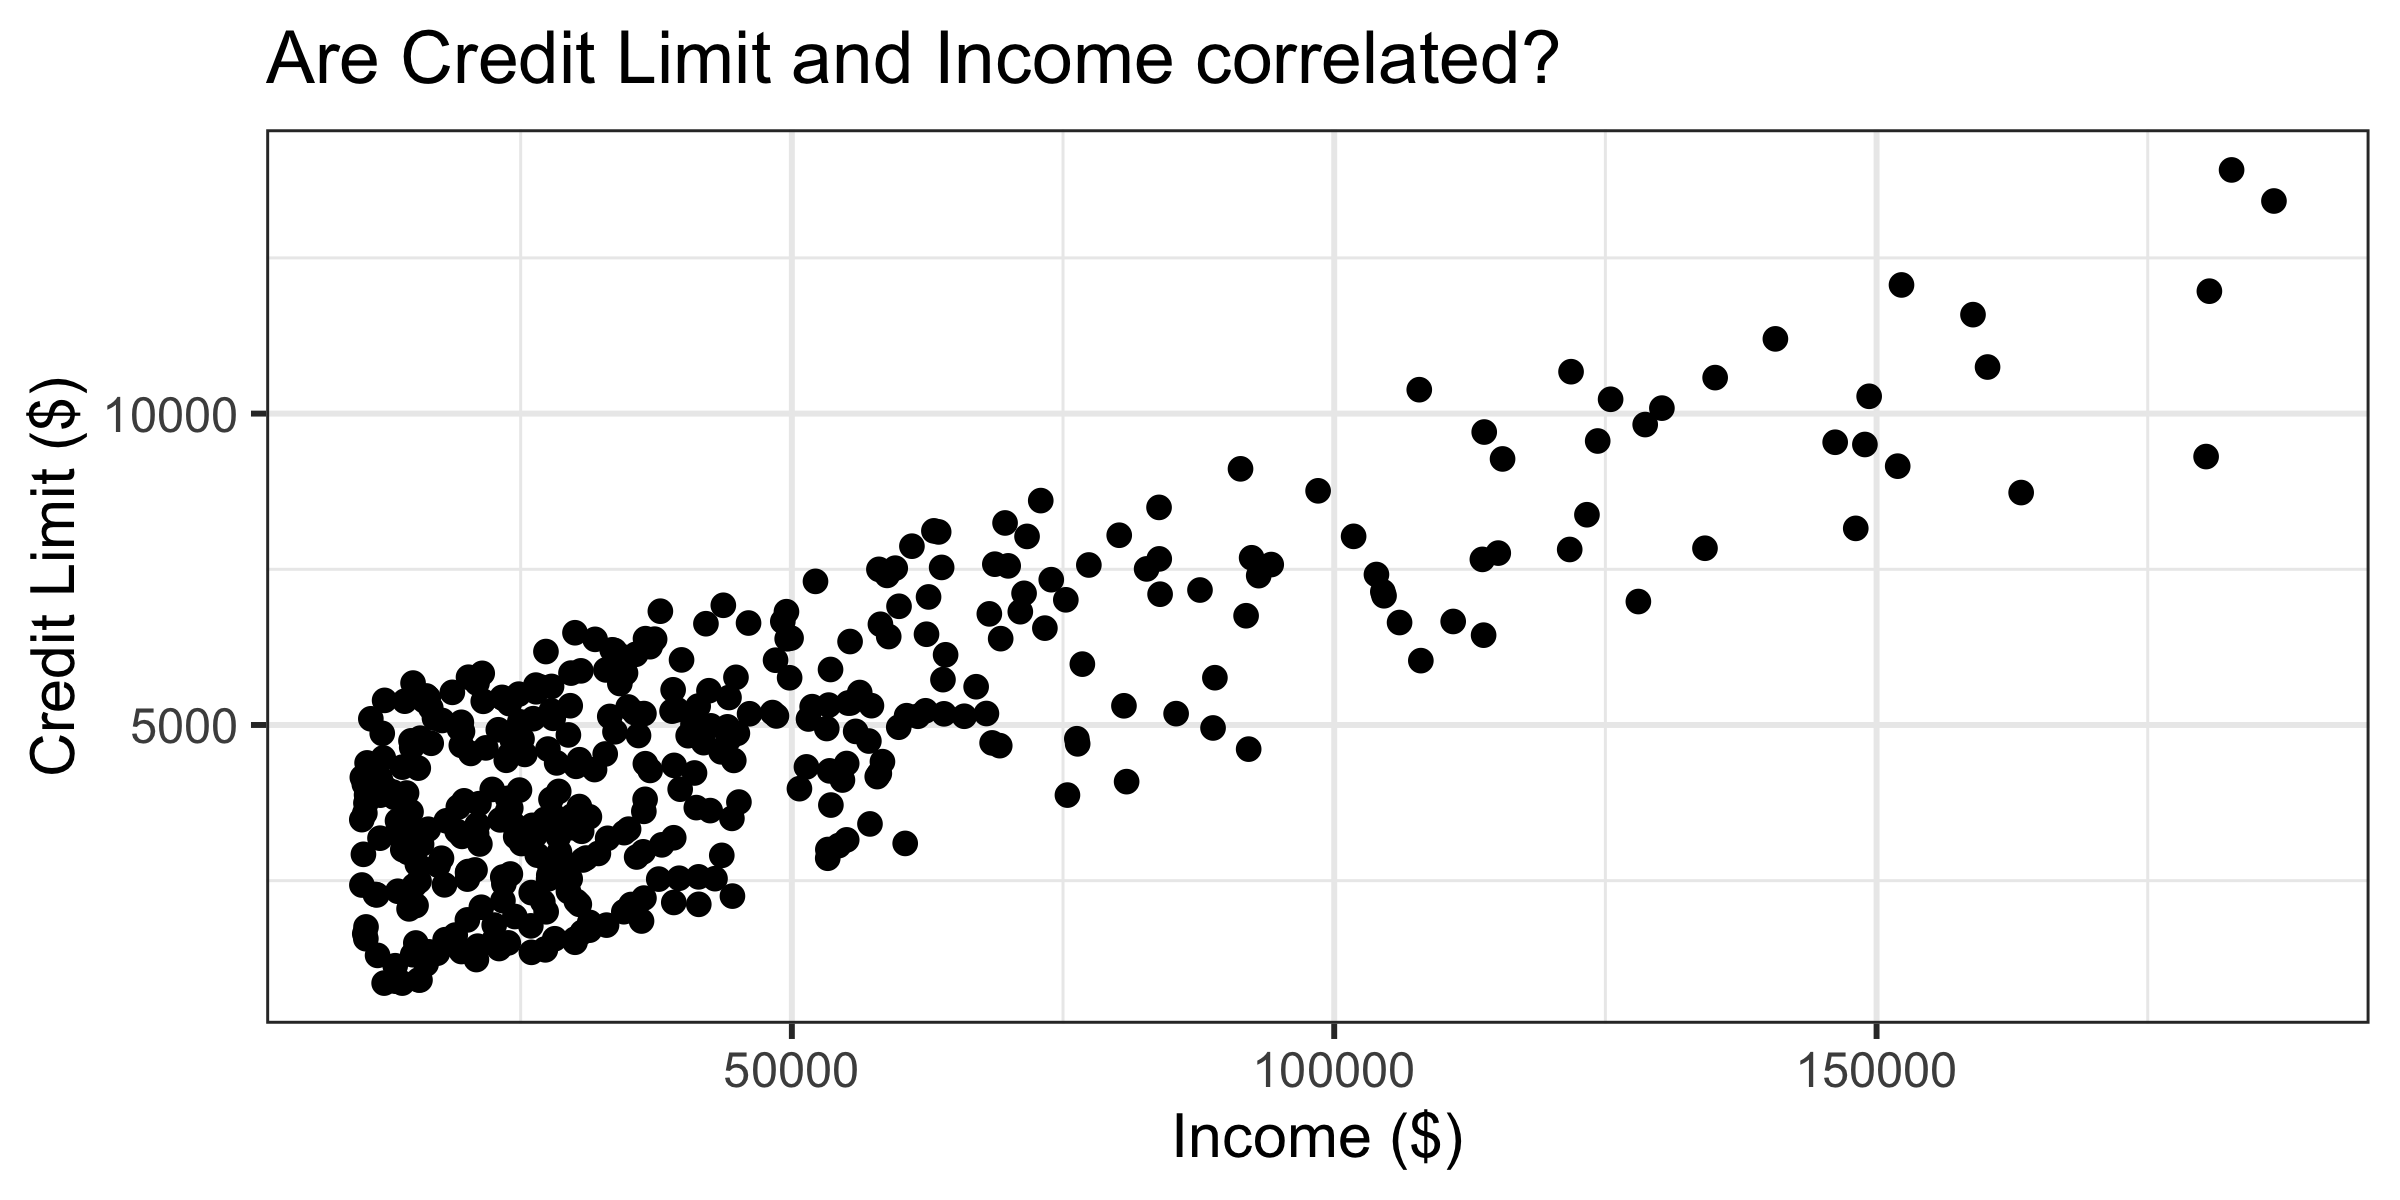

In [154]:
plot4 <- ggplot(data, aes(y = limit, x = income)) +
  geom_point() +
  theme_classic() +
  theme +
  labs(x = "Income ($)", y = "Credit Limit ($)", title = "Are Credit Limit and Income correlated?") #+
# geom_smooth(method = "lm", se = FALSE, formula = y ~ x)

plot4

### Multiple Linear Regression: credit `debt` regressed on `limit`, `income`, and `rating`

In [121]:
model4 <- lm(debt ~ limit + income + rating, data)
fit_summary(model4)

R,R^2,df,nobs,statistic
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.94,0.88,3,400,934.57


#### Interpretation

$R = 0.94 $ - Strength of the linear relationship between two variables.

$R^2 = 0.88 $ -  The proportion of the variance in the response variable that can be explained by the explanatory variables in the regression model.

In [123]:
car::vif(model4)

limit     income     rating 
161.193323   2.687461 160.707918

In [122]:
regression_table(model4)

term,beta,statistic
<chr>,<dbl>,<dbl>
intercept,-489.727,-15.257
limit,0.085,1.894
income,-0.008,-20.418
rating,2.699,4.052


### Multiple Linear Regression: credit `debt` regressed on `income`, `rating`, and `limit`

In [124]:
model5 <- lm(debt ~ income + rating + limit, data)
fit_summary(model5)

R,R^2,df,nobs,statistic
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.94,0.88,3,400,934.57


#### Interpretation

$R = 0.94 $ - Strength of the linear relationship between two variables.

$R^2 = 0.88 $ -  The proportion of the variance in the response variable that can be explained by the explanatory variables in the regression model.

In [77]:
car::vif(model5)

income     rating      limit 
  2.687461 160.707918 161.193323